1. Problem Definition - The goal of this project is to learn more about students and their assessments by using two sets of data.

We want to find out what grade levels the students are in, How old the students are , What types of assessments (like tests or assignments) are used

2. Data Integration 

In [30]:
import pandas as pd
from datetime import datetime

# Load datasets with correct file names
df_students = pd.read_csv("students.csv")       # Student demographic data
df_assessments = pd.read_csv("assessments.csv") # Assessment metadata

# Clean column names
df_students.columns = df_students.columns.str.strip()
df_assessments.columns = df_assessments.columns.str.strip()

# Check if 'Full_Name' column exists before formatting
if 'Full_Name' in df_students.columns:
    df_students['Full_Name'] = df_students['Full_Name'].str.title()

# Convert date of birth to datetime and calculate age
if 'Date_of_Birth' in df_students.columns:
    df_students['Date_of_Birth'] = pd.to_datetime(df_students['Date_of_Birth'], errors='coerce')
    today = pd.Timestamp(datetime.now().date())
    df_students['Age'] = (today - df_students['Date_of_Birth']).dt.days // 365

    def get_age_band(age):
        if pd.isna(age): return "Unknown"
        elif age < 15: return "0-14"
        elif age < 20: return "15-19"
        elif age < 30: return "20-29"
        elif age < 40: return "30-39"
        else: return "40+"

    df_students['Age_Band'] = df_students['Age'].apply(get_age_band)

# Emergency contact validation
if 'Emergency_Contact' in df_students.columns:
    df_students['Has_Valid_Contact'] = df_students['Emergency_Contact'].apply(
        lambda x: pd.notnull(x) and len(str(x).strip()) > 7
    )

# Display the top few rows
df_students.head()



,Student_ID,Full_Name,Date_of_Birth,Grade_Level,Emergency_Contact,Age,Age_Band,Has_Valid_Contact
0,S00001,Donna Williams,2007-02-10,Grade 3,781-534-4258x9046,18.0,15-19,True
1,S00002,John Stafford,2014-11-26,Grade 5,+1-782-691-6291x99704,10.0,0-14,True
2,S00003,Chad Harper,2017-02-07,Grade 3,308.517.3750,8.0,0-14,True
3,S00004,Anthony Martin,NaT,Grade 5,306-771-1524x116,NaN,Unknown,True
4,S00005,Mary Stone,NaT,Grade 3,+1-794-484-8495x7772,NaN,Unknown,True


3. Exploratory Data Analysis (EDA)

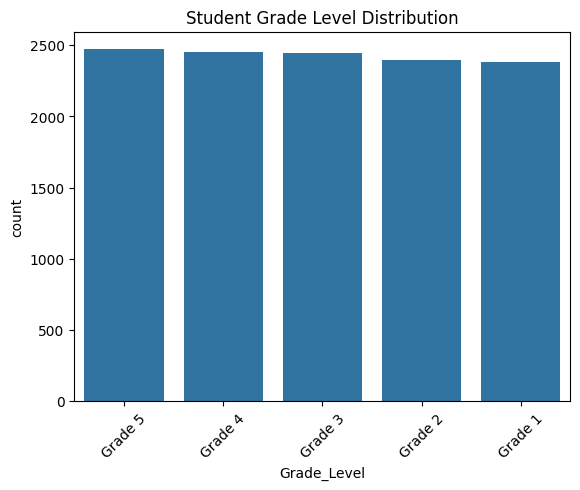

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grade Level Distribution
sns.countplot(data=df_students, x='Grade_Level', order=df_students['Grade_Level'].value_counts().index)
plt.title('Student Grade Level Distribution')
plt.xticks(rotation=45)
plt.show()

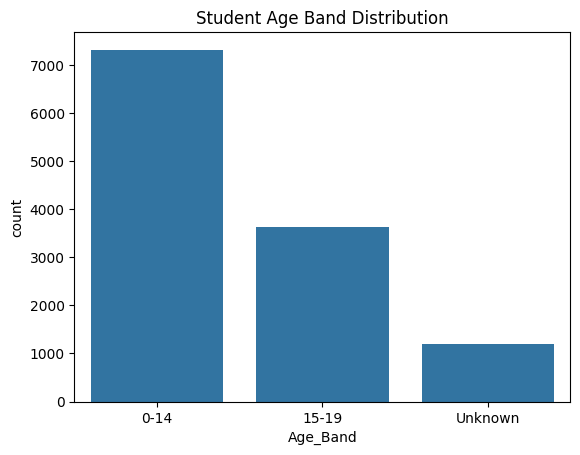

In [32]:
# Age Band Distribution
sns.countplot(data=df_students, x='Age_Band', order=df_students['Age_Band'].value_counts().index)
plt.title('Student Age Band Distribution')
plt.show()

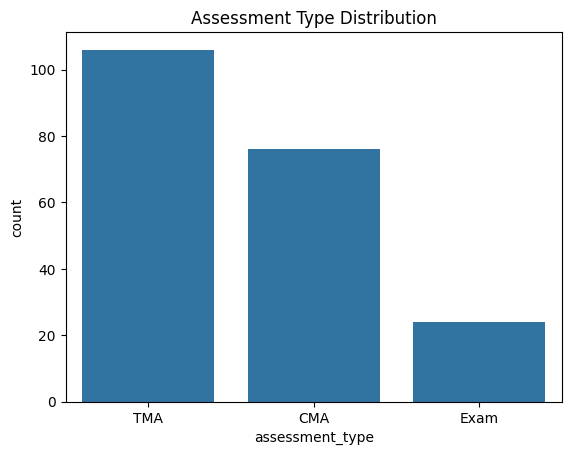

In [33]:
# Assessment Type Distribution
sns.countplot(data=df_assessments, x='assessment_type', order=df_assessments['assessment_type'].value_counts().index)
plt.title('Assessment Type Distribution')
plt.show()

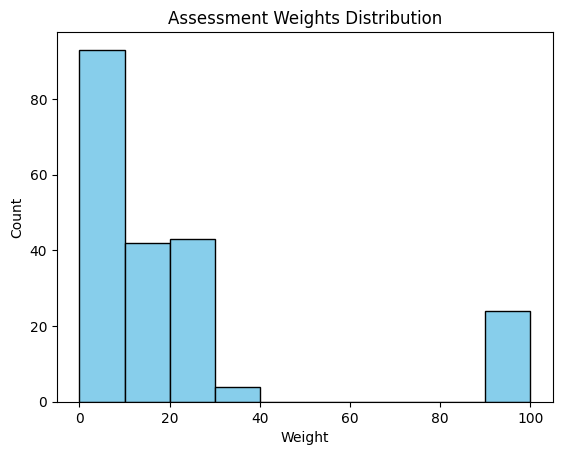

In [34]:
# Assessment Weights Histogram
plt.hist(df_assessments['weight'], bins=10, color='skyblue', edgecolor='black')
plt.title('Assessment Weights Distribution')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

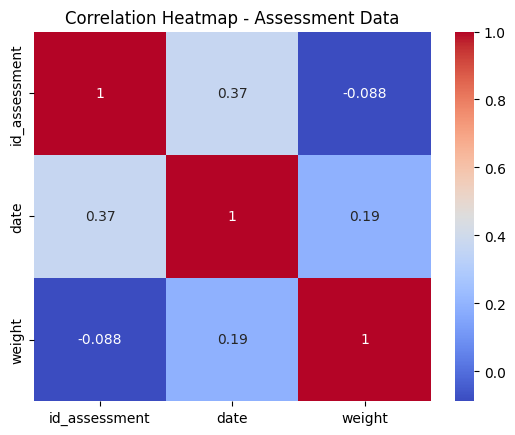

In [35]:
# Correlation Heatmap
sns.heatmap(df_assessments.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Assessment Data')
plt.show()

4. Data Cleaning & Preprocessing 

In [36]:
# Check for missing values
print("Missing values in Student Data:\n", df_students.isnull().sum())
print("\nMissing values in Assessment Data:\n", df_assessments.isnull().sum())

# Fill missing emergency contacts
df_students['Emergency_Contact'].fillna("Not Provided", inplace=True)

# Convert assessment date to numeric
df_assessments['date'] = pd.to_numeric(df_assessments['date'], errors='coerce')

Missing values in Student Data:
 Student_ID              0
Full_Name               0
Date_of_Birth        1205
Grade_Level             0
Emergency_Contact       0
Age                  1205
Age_Band                0
Has_Valid_Contact       0
dtype: int64

Missing values in Assessment Data:
 code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19704\2814531737.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_students['Emergency_Contact'].fillna("Not Provided", inplace=True)


5. Statistical Analysis

In [38]:
# Descriptive statistics
print("Student Age Stats:\n", df_students['Age'].describe())
print("\nAssessment Weight Stats:\n", df_assessments['weight'].describe())

Student Age Stats:
 count    10951.000000
mean        12.317323
std          3.756520
min          6.000000
25%          9.000000
50%         12.000000
75%         16.000000
max         19.000000
Name: Age, dtype: float64

Assessment Weight Stats:
 count    206.000000
mean      20.873786
std       30.384224
min        0.000000
25%        0.000000
50%       12.500000
75%       24.250000
max      100.000000
Name: weight, dtype: float64


In [39]:
# Chi-square test: Grade Level vs Age Band
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df_students['Grade_Level'], df_students['Age_Band'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print(" There is a significant relationship between Grade Level and Age Band.")
else:
    print(" There is no significant relationship between Grade Level and Age Band.")

Chi2 = 7.84, p-value = 0.4492
 There is no significant relationship between Grade Level and Age Band.


In [40]:
# Assuming df_students and df_assessments are your final cleaned DataFrames

#  Save cleaned student dataset to CSV
df_students.to_csv("cleaned_students.csv", index=False)

#  Save cleaned assessment dataset to CSV
df_assessments.to_csv("cleaned_assessments.csv", index=False)

#  Save both datasets into one Excel file with separate sheets (requires openpyxl)
with pd.ExcelWriter("final_cleaned_data.xlsx", engine='openpyxl') as writer:
    df_students.to_excel(writer, sheet_name="Students", index=False)
    df_assessments.to_excel(writer, sheet_name="Assessments", index=False)

print(" Files saved successfully: 'cleaned_students.csv', 'cleaned_assessments.csv', and 'final_cleaned_data.xlsx'")



 Files saved successfully: 'cleaned_students.csv', 'cleaned_assessments.csv', and 'final_cleaned_data.xlsx'
